In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(
    0
)  # We manually set the seed for reproducible results, this is not required

# Challenge 3

* We count events including both background and signal, `r`, with mean `s + b`

* We don't know the value `s`

* We do know `b = 2` from independant measurements

* A measurement gives `r = 10`. Can we determine the value of `s`? with which uncertainty?

In [77]:
from scipy.stats import poisson

In [171]:
n = 23 # range
b = 2
n_values = np.arange(b, n)

X = np.zeros([n - b, n - b])

for s in np.arange(n - b):
    X[s, :] = [poisson(s + b).pmf(i + b) for i in n_values]

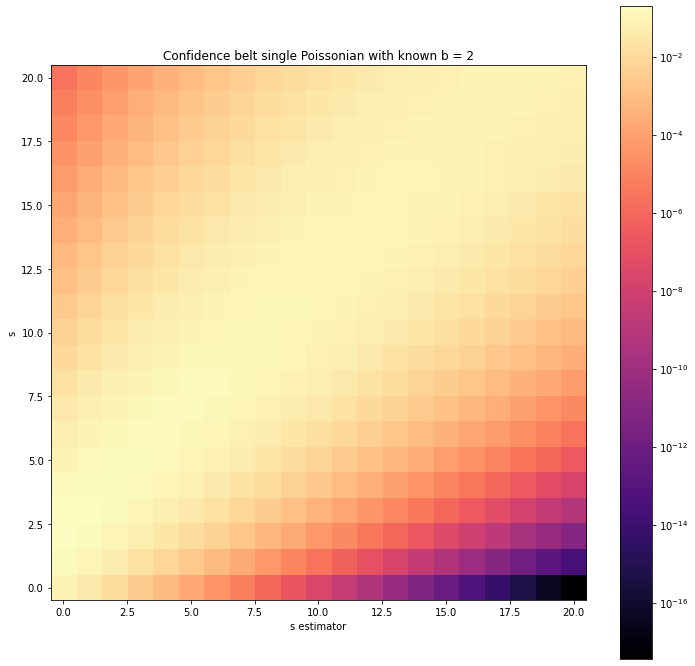

In [172]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(figsize = (12, 12))

im = ax.imshow(X, origin="lower", norm = LogNorm(), cmap="magma")

ax.set_xlabel("s estimator")
ax.set_ylabel("s")
ax.set_title("Confidence belt single Poissonian with known b = 2")

cbar = plt.colorbar(im)

plt.show()

# offset axis 2

In [173]:
def integral(s, limits = None, X = X):
    # X is squared
    # limits is a 2 size array (e.g. limits = [0, 10]) for lower and upper bound
    result = 0
    for i in range(len(X)):
        # we integrate over "s hat" or horizontal dimension
        # limits (if defined) are the limits of the integral, otherwise integrate in the whole range
        if not limits or (limits and i >= limits[0] and i <= limits[1]):
            result += X[s, i]
    return result

s_hat = 10
alpha = 0.32

for s_lower in range(2, len(X)):
    integral_result = integral(s_lower, limits = [s_hat, len(X)])
    print(s_lower, integral_result)
    if integral_result >= alpha / 2:
        break
        
print(f"result for s_lower = {s_lower}")

for s_upper in reversed(range(2, len(X))):
    integral_result = integral(s_upper, limits = [0, s_hat])
    print(s_upper, integral_result)
    if integral_result >= alpha / 2:
        break
        
print(f"result for s_upper = {s_upper}")

2 7.632841377401668e-05
3 0.0006979898191813455
4 0.0036284868512028753
5 0.012811285427166913
6 0.03417952960009138
7 0.0738421161811207
8 0.13548862799926237
9 0.21851011441680004
result for s_lower = 9
20 0.04769243305993658
19 0.07157237421289622
18 0.10486107738820413
17 0.14974201087207265
16 0.20805980237384797
result for s_upper = 16


In [94]:
for i in range(len(X)):
    print(integral(i))

1.0
1.0
0.9999999999999999
0.9999999999997932
0.9999999999402663
0.9999999960857319
0.9999998994609903
0.9999986456722207
0.9999886146928779
0.9999331719726389
0.9997042631919962
0.998957651483493
0.996952628855828
0.9923775488735286
0.9832878060220537
0.9672557550672207
0.9417590724305983
0.9047279537804821
0.8550900690894079
0.7931390279708008
0.720611343126023
0.6404561110924731
0.5563752127390885


In [101]:
result = 0
for i in range(len(X)):
    result += X[]

0.06305545800345125